In [ ]:
NAME = "Shafin Mahamud "
ID = "23101109"
SECTION = "09"

---

## Part 2: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$


## Task 2 - 2 Marks:
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [ ]:
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for col in range(1,n):
      for row in range(0,n-col):
        coef[row,col] = difference(coef[row+1,col-1],coef[row,col-1],x[row+col],x[row])
    return coef[0]

In [ ]:
data_x = [-3.,-2.,-1.,0.,1.,3.,4.]
data_y = [-60.,-80.,6.,1.,45.,30.,16.]

test = calc_div_diff(data_x, data_y)

assert len(test) == len(data_x)

In [ ]:
class Newtons_Divided_Differences:

    def __init__(self, differences):
        self.differences = differences

    def __call__(self, x):

      res = np.zeros(len(x))
      for i in range(len(self.differences)):
        prod=1
        for j in range(i):
          prod*=(x- data_x[j])
        res+= self.differences[i]*prod

      return res

### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

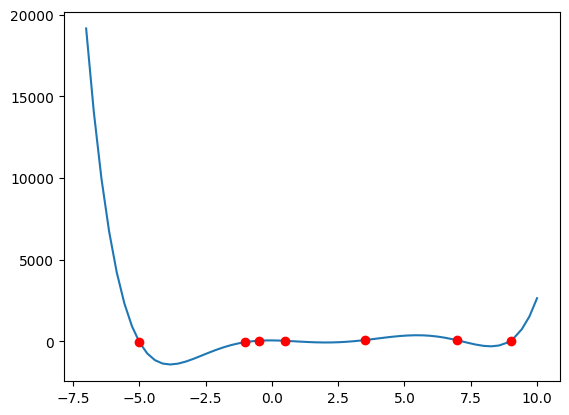

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences))
test_x = np.linspace(-7,10,60, endpoint=True)
test_y = p(test_x)

plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()

# Daily Evaluation - 4 marks

In [ ]:
data_x = np.array([-1.5, 0.5, 1.67])
data_y = np.array([3.75, 1.22, 2.9])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences))
test_x = [0.25]
test_y = p(test_x)
print(test_y[0])

1.1634920731214105
